<a href="https://colab.research.google.com/github/Mutturaj-B/Housing-price-prediction-/blob/main/Housing_price_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import math
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv("/content/Housing price prediction DS and ML .csv")
print(df)

           Suburb             Address  Rooms Type      Price Method  \
0      Abbotsford       68 Studley St      2    h        NaN     SS   
1      Abbotsford        85 Turner St      2    h  1480000.0      S   
2      Abbotsford     25 Bloomburg St      2    h  1035000.0      S   
3      Abbotsford  18/659 Victoria St      3    u        NaN     VB   
4      Abbotsford        5 Charles St      3    h  1465000.0     SP   
...           ...                 ...    ...  ...        ...    ...   
34852  Yarraville         13 Burns St      4    h  1480000.0     PI   
34853  Yarraville       29A Murray St      2    h   888000.0     SP   
34854  Yarraville      147A Severn St      2    t   705000.0      S   
34855  Yarraville    12/37 Stephen St      3    h  1140000.0     SP   
34856  Yarraville    3 Tarrengower St      2    h  1020000.0     PI   

             SellerG        Date  Distance  Postcode  ...  Bathroom  Car  \
0             Jellis   3/09/2016       2.5    3067.0  ...       1.0  1.

In [ ]:
df.isnull().sum()

,0
Suburb,0
Address,0
Rooms,0
Type,0
Price,7610
Method,0
SellerG,0
Date,0
Distance,1
Postcode,1


In [ ]:
df.isnull().sum()

subset_df = df[['Rooms','Price','Type','Date','Distance','Postcode','Bedroom2','Car','Landsize',
                'BuildingArea','YearBuilt','Lattitude','Longtitude','Propertycount',
                'Suburb','Bathroom','CouncilArea']]

# Drop rows with missing values
subset_df = subset_df.dropna()

# Features and target
X = subset_df[['Rooms', 'Landsize', 'YearBuilt', 'Suburb', 'Type', 'Distance',
               'Postcode', 'Bathroom', 'BuildingArea', 'CouncilArea']]
y = subset_df['Price']

In [ ]:
print(subset_df.shape)

(8887, 17)


In [ ]:
print(subset_df.describe())

             Rooms         Price     Distance     Postcode     Bedroom2  \
count  8887.000000  8.887000e+03  8887.000000  8887.000000  8887.000000   
mean      3.098909  1.092902e+06    11.199887  3111.662653     3.078204   
std       0.963786  6.793819e+05     6.813402   112.614268     0.966269   
min       1.000000  1.310000e+05     0.000000  3000.000000     0.000000   
25%       2.000000  6.410000e+05     6.400000  3044.000000     2.000000   
50%       3.000000  9.000000e+05    10.200000  3084.000000     3.000000   
75%       4.000000  1.345000e+06    13.900000  3150.000000     4.000000   
max      12.000000  9.000000e+06    47.400000  3977.000000    12.000000   

               Car      Landsize  BuildingArea    YearBuilt    Lattitude  \
count  8887.000000   8887.000000   8887.000000  8887.000000  8887.000000   
mean      1.692247    523.480365    149.309477  1965.753348   -37.804501   
std       0.975464   1061.324228     87.925580    37.040876     0.090549   
min       0.000000  

In [ ]:
print(subset_df.dtypes)

Rooms              int64
Price            float64
Type              object
Date              object
Distance         float64
Postcode         float64
Bedroom2         float64
Car              float64
Landsize         float64
BuildingArea     float64
YearBuilt        float64
Lattitude        float64
Longtitude       float64
Propertycount    float64
Suburb            object
Bathroom         float64
CouncilArea       object
dtype: object


In [ ]:
# Preprocessing the data
#median_price = math.floor(df.price.median())
#print('median_price', median_price)
#df.Price = df.Price.fillna(Price)

In [ ]:
# Select features and target
X = subset_df[['Rooms', 'Landsize', 'YearBuilt','Type','Distance','Postcode','BuildingArea']]
y = subset_df['Price']

# Convert categorical column 'Type' into numeric using one-hot encoding
X = pd.get_dummies(X, drop_first=True)

# Then split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Train the model
reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)


LinearRegression()

In [ ]:

# Drop missing values
subset_df = subset_df.dropna()

# Select features and target
X = subset_df[['Rooms', 'Landsize', 'YearBuilt','Suburb','Type','Distance','Postcode','Bathroom','BuildingArea','CouncilArea']]
y = subset_df['Price']

# Convert all categorical features to numeric
X = pd.get_dummies(X, drop_first=True)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Train model
reg = linear_model.Lasso()
reg.fit(X_train, y_train)


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.013e+14, tolerance: 2.923e+11
  model = cd_fast.enet_coordinate_descent(


Lasso()

In [ ]:
print('reg.coef_', reg.coef_)#display the weights for each feature

reg.coef_ [ 1.35634737e+05  2.99903503e+01 -1.92070220e+03 -4.35328051e+04
  9.26203394e+02  1.59997525e+05  1.35444601e+03  3.07239266e+05
 -1.25472122e+05 -4.67366896e+04  2.44695603e+05  1.47064365e+05
  1.41166589e+05  2.52328174e+05 -1.12812293e+05 -1.25401599e+05
 -9.82045884e+04  4.91404061e+05 -1.27495686e+05  3.32174633e+05
 -2.56346711e+02  9.03947367e+04 -5.91933524e+04  7.47594952e+03
 -2.11105255e+05  0.00000000e+00 -1.52573834e+05  5.55769685e+05
  3.35374602e+05  2.46854037e+05 -7.78710577e+04 -1.06455857e+05
 -4.54970847e+04  6.01372048e+05 -2.62973403e+05  8.36818825e+04
 -0.00000000e+00  1.46320616e+05  4.39750637e+05  1.56963886e+05
 -6.56733411e+04 -7.45976652e+04  2.43509803e+05  1.53157281e+05
 -2.68952630e+04  3.10213489e+05 -9.01187886e+04  9.09804451e+04
  7.16954834e+05  1.63973355e+05  2.67283645e+04 -1.33412717e+04
  2.53440508e+04 -4.09019387e+04 -2.55394520e+04 -9.43843332e+04
 -1.54392362e+05 -4.46454662e+05 -1.71945693e+05  2.21868766e+05
 -1.84884860e+0

In [ ]:
print('reg.intercept_',reg.intercept_)#b is the intercept-this is ine the formula

reg.intercept_ 1585383.37953788


In [ ]:
# Predict
predicted = reg.predict(X_test)

In [ ]:
# Manual prediction
price = (3.31050387e+05*3)+(1.86072855e+01*150)+(-5.96557092e+03*2000)+11788514.052661577
price

853314.466486577

In [ ]:
## Evaluate the model
from sklearn.metrics import mean_squared_error
# Calculate Mean Squared Error (MSE) to evaluate prediction error
mse = mean_squared_error(y_test, predicted)#compares my model predictions with the actual house prices
print("Model trained successfully.")
print("Mean Squared Error (MSE):", mse)#lower the MSE the better my model is at making accurate predictions

Model trained successfully.
Mean Squared Error (MSE): 136063498175.91371


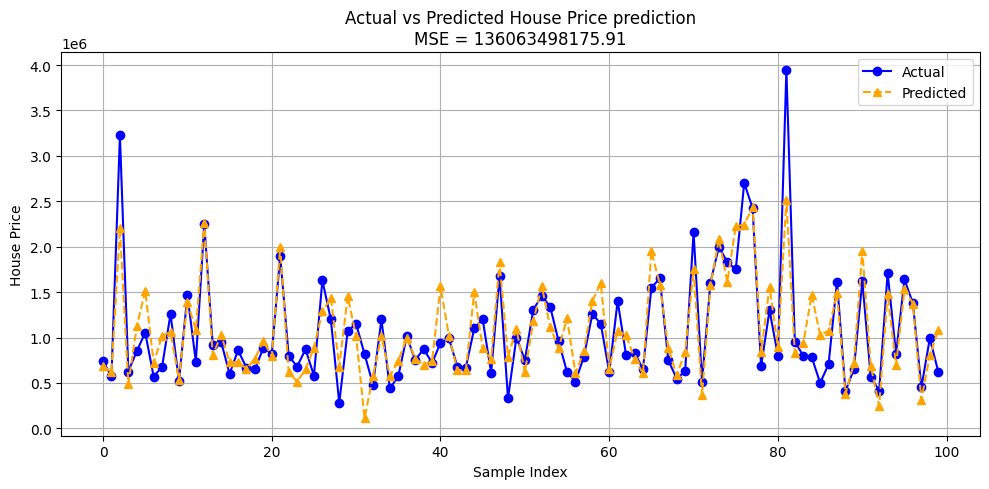

In [ ]:
import matplotlib.pyplot as plt

# Plot Actual vs Predicted labels
# Plot Actual vs Predicted labels
plt.figure(figsize=(10, 5))
plt.plot(y_test.values[:100], label='Actual', marker='o', linestyle='-', color='blue')#Plots the first 100 actual house prices
plt.plot(predicted[:100], label='Predicted', marker='^', linestyle='--', color='orange')#the first 100 predicted prices made by the model
plt.title(f'Actual vs Predicted House Price prediction\nMSE = {mse:.2f}')
plt.xlabel('Sample Index')
plt.ylabel('House Price')#the price of a house
plt.legend()#legend to show which line is "Actual" and which is Predicted
plt.grid(True)
plt.tight_layout()
plt.show()